In [1]:
import numpy as np
import pandas as pd
import pickle
import numpy as np
import pandas as pd
from collections import defaultdict
from scipy.stats import hmean
from scipy.spatial.distance import cdist
from scipy import stats
import numbers
from urllib.request import urlopen
from numpy import loadtxt
from numpy import unique
import matplotlib.pyplot as plot
import missingno as mano
%matplotlib inline
import numpy as np 
import statsmodels.api as sm 
import pylab as py 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns
from scipy.stats import shapiro

import pandas as pd
import numpy as np
%matplotlib inline
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols


F1: loading data in a dataframe (either CSV or Excel - can be generalized for databases)

In [2]:
def load_file(filepath, ext):
    ext=ext
    if ext=='csv':
        data =  []
        col = []
        checkcol = False
        with open(filepath) as f:
            for val in f.readlines():
                val = val.replace("\n","")
                val = val.split(',')
                if checkcol is False:
                    col = val
                    checkcol = True
                else:
                    data.append(val)
        df = pd.DataFrame(data=data, columns=col)
    elif ext=='xlsx':
        df = pd.read_excel(filepath)
    else:
        df='No such file can be extracted'
    return df

df=load_file('C:\\Users\\waliullah\\Desktop\\Machine Learning\\Assignment-6\\Bankruptcy\\data.xlsx','xlsx')
df


,Bankrupt,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0,0.493687,0.539468,0.543230,0.604455,0.604462,0.998992,0.797409,0.809331,0.303510,...,0.799927,0.000466,0.623620,0.604455,0.840359,0.279606,0.027064,0.566193,1,0.029890
6815,0,0.475162,0.538269,0.524172,0.598308,0.598308,0.998992,0.797414,0.809327,0.303520,...,0.799748,0.001959,0.623931,0.598306,0.840306,0.278132,0.027009,0.566018,1,0.038284
6816,0,0.472725,0.533744,0.520638,0.610444,0.610213,0.998984,0.797401,0.809317,0.303512,...,0.797778,0.002840,0.624156,0.610441,0.840138,0.275789,0.026791,0.565158,1,0.097649
6817,0,0.506264,0.559911,0.554045,0.607850,0.607850,0.999074,0.797500,0.809399,0.303498,...,0.811808,0.002837,0.623957,0.607846,0.841084,0.277547,0.026822,0.565302,1,0.044009


In [3]:
print(df.dtypes)

Bankrupt                                                      int64
 ROA(C) before interest and depreciation before interest    float64
 ROA(A) before interest and % after tax                     float64
 ROA(B) before interest and depreciation after tax          float64
 Operating Gross Margin                                     float64
                                                             ...   
 Liability to Equity                                        float64
 Degree of Financial Leverage (DFL)                         float64
 Interest Coverage Ratio (Interest expense to EBIT)         float64
 Net Income Flag                                              int64
 Equity to Liability                                        float64
Length: 96, dtype: object


In [4]:
def correlation1(data):
    plt.figure(figsize=(16, 6))
    heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True)
    # Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
    heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

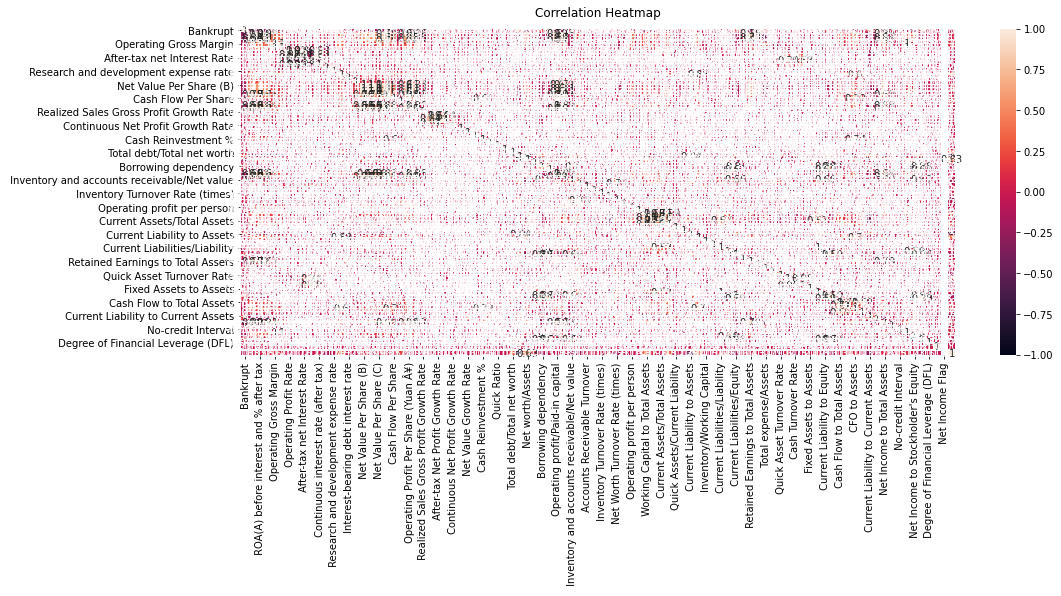

In [5]:
correlation1(df)

In [8]:
def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
                if colname in dataset.columns:
                    del dataset[colname] # deleting the column from the dataset

    #print(dataset)
    return dataset

In [29]:
df1=correlation(df, 0.6)
df1

,Bankrupt,ROA(C) before interest and depreciation before interest,Operating Gross Margin,Operating Profit Rate,Non-industry income and expenditure/revenue,Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),...,Cash Flow to Total Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Total assets to GNP price,No-credit Interval,Net Income to Stockholder's Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag
0,1,0.370594,0.601457,0.998969,0.302646,1.256969e-04,0.000000e+00,0.458143,7.250725e-04,0.000000,...,0.637555,0.312905,0.118250,0,0.009219,0.622879,0.827890,0.026601,0.564050,1
1,1,0.464291,0.610235,0.998946,0.303556,2.897851e-04,0.000000e+00,0.461867,6.470647e-04,0.000000,...,0.641100,0.314163,0.047775,0,0.008323,0.623652,0.839969,0.264577,0.570175,1
2,1,0.426071,0.601450,0.998857,0.302035,2.361297e-04,2.550000e+07,0.458521,7.900790e-04,0.000000,...,0.642765,0.314515,0.025346,0,0.040003,0.623841,0.836774,0.026555,0.563706,1
3,1,0.399844,0.583541,0.998700,0.303350,1.078888e-04,0.000000e+00,0.465705,4.490449e-04,0.000000,...,0.579039,0.302382,0.067250,0,0.003252,0.622929,0.834697,0.026697,0.564663,1
4,1,0.465022,0.598783,0.998973,0.303475,7.890000e+09,0.000000e+00,0.462746,6.860686e-04,0.000000,...,0.622374,0.311567,0.047725,0,0.003878,0.623521,0.839973,0.024752,0.575617,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0,0.493687,0.604455,0.998992,0.303510,1.510213e-04,4.500000e+09,0.463734,1.790179e-04,0.113372,...,0.639806,0.314063,0.027951,0,0.000466,0.623620,0.840359,0.027064,0.566193,1
6815,0,0.475162,0.598308,0.998992,0.303520,5.220000e+09,1.440000e+09,0.461978,2.370237e-04,0.371596,...,0.642072,0.314446,0.031470,0,0.001959,0.623931,0.840306,0.027009,0.566018,1
6816,0,0.472725,0.610444,0.998984,0.303512,2.509312e-04,1.039086e-04,0.472189,0.000000e+00,0.490839,...,0.631678,0.313353,0.007542,0,0.002840,0.624156,0.840138,0.026791,0.565158,1
6817,0,0.506264,0.607850,0.999074,0.303498,1.236154e-04,2.510000e+09,0.476123,2.110211e-04,0.181294,...,0.684857,0.320118,0.022916,0,0.002837,0.623957,0.841084,0.026822,0.565302,1


In [30]:
df1.columns

Index(['Bankrupt', ' ROA(C) before interest and depreciation before interest',
       ' Operating Gross Margin', ' Operating Profit Rate',
       ' Non-industry income and expenditure/revenue',
       ' Operating Expense Rate', ' Research and development expense rate',
       ' Cash flow rate', ' Interest-bearing debt interest rate',
       ' Tax rate (A)', ' Net Value Per Share (B)', ' Cash Flow Per Share',
       ' Revenue Per Share (Yuan Â¥)',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit Growth Rate', ' Continuous Net Profit Growth Rate',
       ' Total Asset Growth Rate', ' Net Value Growth Rate',
       ' Total Asset Return Growth Rate Ratio', ' Current Ratio',
       ' Quick Ratio', ' Interest Expense Ratio',
       ' Total debt/Total net worth', ' Debt ratio %', ' Net worth/Assets',
       ' Long-term fund suitability ratio (A)', ' Borrowing dependency',
       ' Contingent liabilities/Net worth', ' Total Asset Turnover',
       ' Accounts Receiva

In [32]:

df1.drop(' Net Income Flag', inplace=True, axis=1)
df1

,Bankrupt,ROA(C) before interest and depreciation before interest,Operating Gross Margin,Operating Profit Rate,Non-industry income and expenditure/revenue,Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),...,Fixed Assets to Assets,Cash Flow to Total Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Total assets to GNP price,No-credit Interval,Net Income to Stockholder's Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT)
0,1,0.370594,0.601457,0.998969,0.302646,1.256969e-04,0.000000e+00,0.458143,7.250725e-04,0.000000,...,0.424206,0.637555,0.312905,0.118250,0,0.009219,0.622879,0.827890,0.026601,0.564050
1,1,0.464291,0.610235,0.998946,0.303556,2.897851e-04,0.000000e+00,0.461867,6.470647e-04,0.000000,...,0.468828,0.641100,0.314163,0.047775,0,0.008323,0.623652,0.839969,0.264577,0.570175
2,1,0.426071,0.601450,0.998857,0.302035,2.361297e-04,2.550000e+07,0.458521,7.900790e-04,0.000000,...,0.276179,0.642765,0.314515,0.025346,0,0.040003,0.623841,0.836774,0.026555,0.563706
3,1,0.399844,0.583541,0.998700,0.303350,1.078888e-04,0.000000e+00,0.465705,4.490449e-04,0.000000,...,0.559144,0.579039,0.302382,0.067250,0,0.003252,0.622929,0.834697,0.026697,0.564663
4,1,0.465022,0.598783,0.998973,0.303475,7.890000e+09,0.000000e+00,0.462746,6.860686e-04,0.000000,...,0.309555,0.622374,0.311567,0.047725,0,0.003878,0.623521,0.839973,0.024752,0.575617
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0,0.493687,0.604455,0.998992,0.303510,1.510213e-04,4.500000e+09,0.463734,1.790179e-04,0.113372,...,0.400338,0.639806,0.314063,0.027951,0,0.000466,0.623620,0.840359,0.027064,0.566193
6815,0,0.475162,0.598308,0.998992,0.303520,5.220000e+09,1.440000e+09,0.461978,2.370237e-04,0.371596,...,0.096136,0.642072,0.314446,0.031470,0,0.001959,0.623931,0.840306,0.027009,0.566018
6816,0,0.472725,0.610444,0.998984,0.303512,2.509312e-04,1.039086e-04,0.472189,0.000000e+00,0.490839,...,0.055509,0.631678,0.313353,0.007542,0,0.002840,0.624156,0.840138,0.026791,0.565158
6817,0,0.506264,0.607850,0.999074,0.303498,1.236154e-04,2.510000e+09,0.476123,2.110211e-04,0.181294,...,0.246805,0.684857,0.320118,0.022916,0,0.002837,0.623957,0.841084,0.026822,0.565302


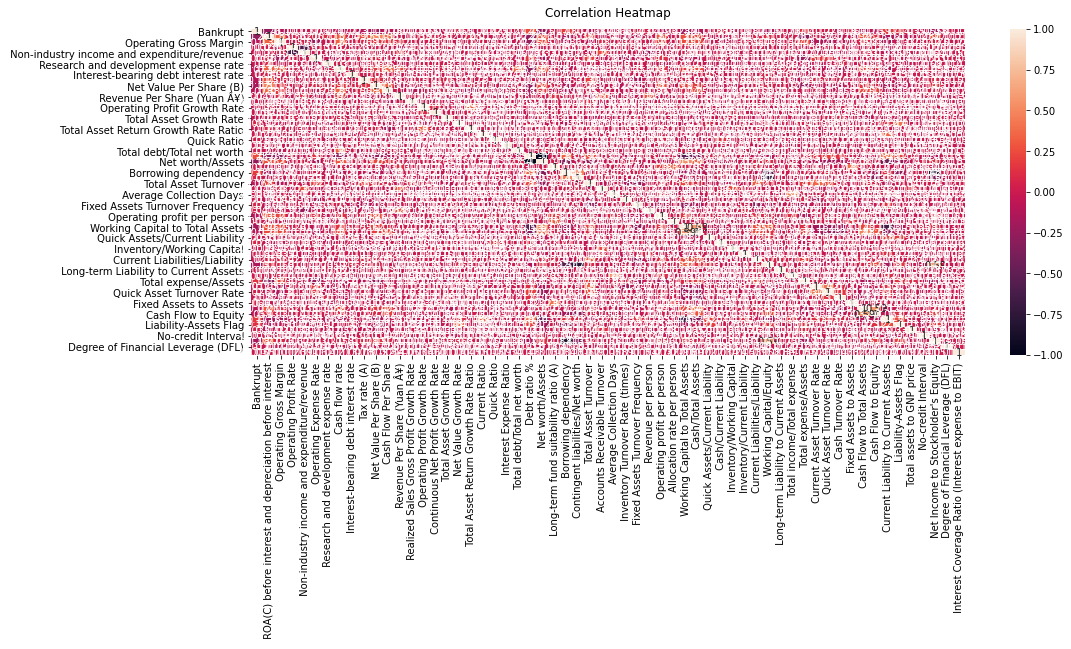

In [33]:
correlation1(df1)

Function-2: checking shape, column types, and see the first/last 'n' rows using head/tail (where n is one of the arguments of F2)


In [34]:
def data_display(data, n):
    # Create a DataFrame object
    df = pd.DataFrame(data)
    #print("Contents of the Dataframe : ")
    #print(df)
    
    print('**** Shape of the Data ****')
    #df.shape
    print(df.shape)
    print('**** Columns Name ****')
    print(df.columns)
    print('**** Data Type of Columns ****')
    print(df.dtypes)
    
    print('**** Select first n Rows from a Dataframe using head() function ****')
    # Select the top n rows of the Dataframe
    dfObj1 = df.head(n)
    print("First", n, "rows of the Dataframe : ")
    print(dfObj1)
    print('**** Select last n Rows from a Dataframe using tail() function ****')
    # Select the bottom n rows of the Dataframe
    dfObj2 = df.tail(n)
    print("Last",n, "rows of the Dataframe : ")
    print(dfObj2)

#call function
data_display(df1, 10)

**** Shape of the Data ****
(6819, 60)
**** Columns Name ****
Index(['Bankrupt', ' ROA(C) before interest and depreciation before interest',
       ' Operating Gross Margin', ' Operating Profit Rate',
       ' Non-industry income and expenditure/revenue',
       ' Operating Expense Rate', ' Research and development expense rate',
       ' Cash flow rate', ' Interest-bearing debt interest rate',
       ' Tax rate (A)', ' Net Value Per Share (B)', ' Cash Flow Per Share',
       ' Revenue Per Share (Yuan Â¥)',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit Growth Rate', ' Continuous Net Profit Growth Rate',
       ' Total Asset Growth Rate', ' Net Value Growth Rate',
       ' Total Asset Return Growth Rate Ratio', ' Current Ratio',
       ' Quick Ratio', ' Interest Expense Ratio',
       ' Total debt/Total net worth', ' Debt ratio %', ' Net worth/Assets',
       ' Long-term fund suitability ratio (A)', ' Borrowing dependency',
       ' Contingent liabilities/

F3:remove unnecessary/useless columns (based on results of F2 and your background knowledge and the problem to be solved), e.g., identifiers, multiple primary keys, extra KPI like GMROI in sales which is the same for the whole year etc.

In [15]:
df2 = df1[:].values
df2

array([[1.        , 0.37059426, 0.60145721, ..., 0.02660063, 0.56405011,
        1.        ],
       [1.        , 0.46429094, 0.61023509, ..., 0.26457682, 0.57017495,
        1.        ],
       [1.        , 0.42607127, 0.60145001, ..., 0.02655472, 0.56370608,
        1.        ],
       ...,
       [0.        , 0.47272461, 0.61044408, ..., 0.02679116, 0.5651584 ,
        1.        ],
       [0.        , 0.50626432, 0.60784964, ..., 0.02682205, 0.56530151,
        1.        ],
       [0.        , 0.49305319, 0.62740887, ..., 0.02679295, 0.56516694,
        1.        ]])

In [13]:
# delete columns with a single unique value

def dt2(data):
    #df1=data
    # get number of unique values for each column
    df = pd.DataFrame(data)
    counts = df.nunique()
    #print(counts)
    # record columns to delete
    to_del1 = [i for i,v in enumerate(counts) if v == 1]
    print(to_del1)
    # drop useless columns
    df.drop(to_del1, axis=1, inplace=True)
    
    #df = pd.DataFrame(df1)
    print('First Operation')
    print(df.shape)
    # delete columns where number of unique values is less than 1% of the rows
    # get number of unique values for each column
    counts = df.nunique()
    # record columns to delete
    to_del = [i for i,v in enumerate(counts) if (float(v)/df.shape[0]*100) < 1]
    
    print(to_del)
    # drop useless columns
    df.drop(to_del, axis=1, inplace=True)
    print('2nd Operation')
    print(df.shape)
    
    # delete rows of duplicate data from the dataset
    df.drop_duplicates(inplace=True)
    print('3rd Operation')
    print(df.shape)
    
    return df

In [16]:
df3=dt2(df2)
df3.columns

[60]
First Operation
(6819, 60)
[0, 54]
2nd Operation
(6819, 58)
3rd Operation
(6819, 58)


Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
            18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
            35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
            52, 53, 55, 56, 57, 58, 59],
           dtype='int64')

F5: determine the missing values in the whole dataset

Bankrupt                                                    0
 ROA(C) before interest and depreciation before interest    0
 Operating Gross Margin                                     0
 Operating Profit Rate                                      0
 Non-industry income and expenditure/revenue                0
 Operating Expense Rate                                     0
 Research and development expense rate                      0
 Cash flow rate                                             0
 Interest-bearing debt interest rate                        0
 Tax rate (A)                                               0
 Net Value Per Share (B)                                    0
 Cash Flow Per Share                                        0
 Revenue Per Share (Yuan Â¥)                                0
 Realized Sales Gross Profit Growth Rate                    0
 Operating Profit Growth Rate                               0
 Continuous Net Profit Growth Rate                          0
 Total A

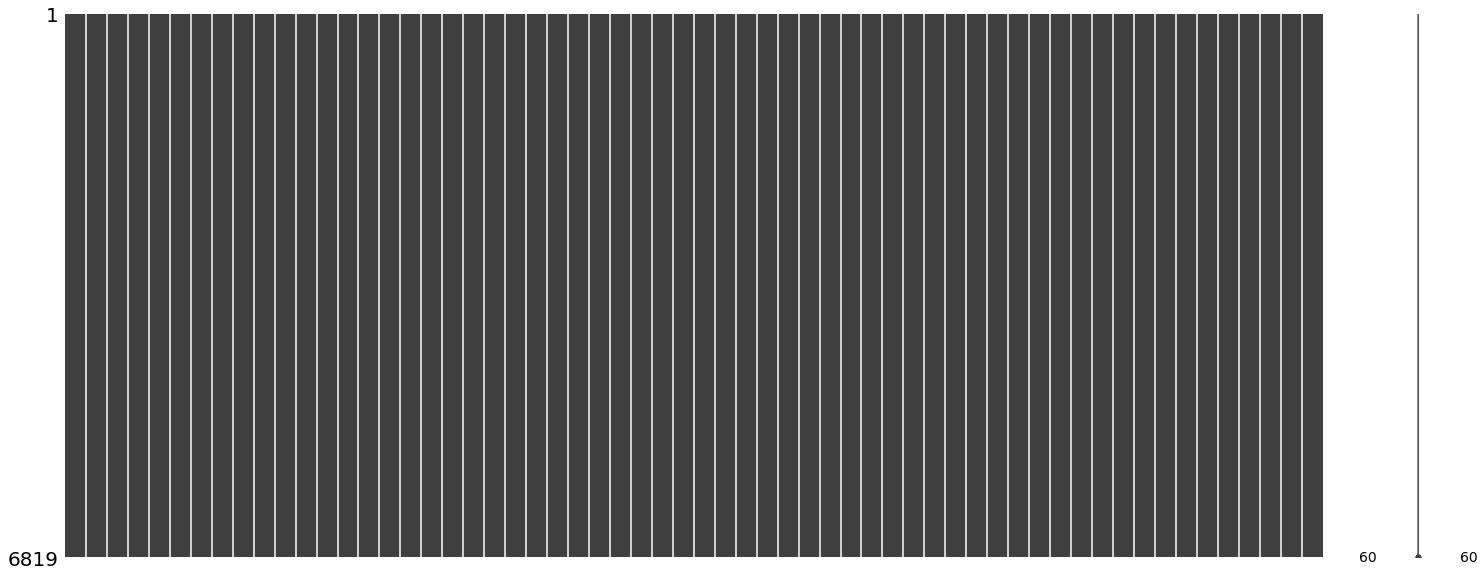

In [35]:
def misval(data):
    df=data
    #print (df.isnull())
    print(df.isnull().sum())
    mano.matrix(df)

misval(df1)

In [37]:
df1.describe()

,Bankrupt,ROA(C) before interest and depreciation before interest,Operating Gross Margin,Operating Profit Rate,Non-industry income and expenditure/revenue,Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),...,Fixed Assets to Assets,Cash Flow to Total Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Total assets to GNP price,No-credit Interval,Net Income to Stockholder's Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT)
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,...,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000
mean,0.032263,0.505180,0.607948,0.998755,0.303623,1.995347e+09,1.950427e+09,0.467431,1.644801e+07,0.115001,...,1.220121e+06,0.649731,0.315582,0.031506,0.001173,1.862942e+07,0.623915,0.840402,0.027541,0.565358
std,0.176710,0.060686,0.016934,0.013010,0.011163,3.237684e+09,2.598292e+09,0.017036,1.082750e+08,0.138667,...,1.007542e+08,0.047372,0.012961,0.030845,0.034234,3.764501e+08,0.012290,0.014523,0.015668,0.013214
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.476527,0.600445,0.998969,0.303466,1.566874e-04,1.281880e-04,0.461558,2.030203e-04,0.000000,...,8.536037e-02,0.633265,0.312995,0.018034,0.000000,9.036205e-04,0.623636,0.840115,0.026791,0.565158
50%,0.000000,0.502706,0.605997,0.999022,0.303525,2.777589e-04,5.090000e+08,0.465080,3.210321e-04,0.073489,...,1.968810e-01,0.645366,0.314953,0.027597,0.000000,2.085213e-03,0.623879,0.841179,0.026808,0.565252
75%,0.000000,0.535563,0.613914,0.999095,0.303585,4.145000e+09,3.450000e+09,0.471004,5.325533e-04,0.205841,...,3.722000e-01,0.663062,0.317707,0.038375,0.000000,5.269777e-03,0.624168,0.842357,0.026913,0.565725
max,1.000000,1.000000,1.000000,1.000000,1.000000,9.990000e+09,9.980000e+09,1.000000,9.900000e+08,1.000000,...,8.320000e+09,1.000000,1.000000,1.000000,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000


In [39]:
df1.columns

Index(['Bankrupt', ' ROA(C) before interest and depreciation before interest',
       ' Operating Gross Margin', ' Operating Profit Rate',
       ' Non-industry income and expenditure/revenue',
       ' Operating Expense Rate', ' Research and development expense rate',
       ' Cash flow rate', ' Interest-bearing debt interest rate',
       ' Tax rate (A)', ' Net Value Per Share (B)', ' Cash Flow Per Share',
       ' Revenue Per Share (Yuan Â¥)',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit Growth Rate', ' Continuous Net Profit Growth Rate',
       ' Total Asset Growth Rate', ' Net Value Growth Rate',
       ' Total Asset Return Growth Rate Ratio', ' Current Ratio',
       ' Quick Ratio', ' Interest Expense Ratio',
       ' Total debt/Total net worth', ' Debt ratio %', ' Net worth/Assets',
       ' Long-term fund suitability ratio (A)', ' Borrowing dependency',
       ' Contingent liabilities/Net worth', ' Total Asset Turnover',
       ' Accounts Receiva

In [49]:
df1.to_excel('Bruptcy_finaldata.xlsx')

F15: function to split dataframe into X (predictors) and y (label), apply standard scaling on X, apply the desired ML algorithm and output the results:¶
Â - input dataframe Â - input the algo name (e.g., decisiontree) Â - input whether this is a classification task or a regression task (then you should select either decisiontreeclassifier or decisiontreeregressor within the function) Â - for classification, output confusion matrix, AUC, logloss and classification report Â - for regression, output MAE, MSE, R-squared and adjusted R-squaredÂ Â - NB: you can add more metrics if available

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB  
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix 
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [45]:
def LReg(x_train, x_test, y_train, y_test):
    print('================================================================================')
    print('Linear Regression Model Results')
    print('_______________________________________________________________________________')
    #LinearRegression model
    LR = LinearRegression(normalize=True)

    #fit
    LR.fit(x_train, y_train)

    #predict
    y_predict = LR.predict(x_test)

    #score variables
    LR_MAE = round(MAE(y_test, y_predict),2)
    LR_MSE = round(MSE(y_test, y_predict),2)
    LR_R_2 = round(R2(y_test, y_predict),4)
    LR_CS  = round(CVS(LR, x, y, cv=5).mean(),4)

    print(f" Mean Absolute Error: {LR_MAE}\n")
    print(f" Mean Squared Error: {LR_MSE}\n")
    print(f" R^2 Score: {LR_R_2}\n")
    cross_val(LR,LinearRegression(),x,y,5)
    Linear_Regression=pd.DataFrame({'y_test':y_test,'prediction':y_predict})
    Linear_Regression
    print('================================================================================')


def LASOO(x_train, x_test, y_train, y_test):
    #model
    print('================================================================================')
    print('Lasso Regression Model Results')
    print('_______________________________________________________________________________')
    LS = Lasso(alpha = 0.9)
    #fit
    LS.fit(x_train,y_train)

    #predict
    y_predict = LS.predict(x_test)

    #score variables
    LS_MAE = round(MAE(y_test, y_predict),2)
    LS_MSE = round(MSE(y_test, y_predict),2)
    LS_R_2 = round(R2(y_test, y_predict),4)
    LS_CS  = round(CVS(LS, x, y, cv=5).mean(),4)

    print(f" Mean Absolute Error: {LS_MAE}\n")
    print(f" Mean Squared Error: {LS_MSE}\n")
    print(f" R^2 Score: {LS_R_2}\n")
    cross_val(LS,Lasso(alpha = 0.05),x,y,5)
    Lasso_Regressor=pd.DataFrame({'y_test':y_test,'prediction':y_predict})
    Lasso_Regressor 
    print('================================================================================')

    
    
#Decision Tree for Regression    
    


def DTReg(x_train, x_test, y_train, y_test):
    #model
    print('================================================================================')
    print('Decision Tree Model Results for Regression Problem')
    print('_______________________________________________________________________________')
    
    #from sklearn.tree import DecisionTreeRegressor
    #from sklearn import metrics
    regressor = DecisionTreeRegressor()
    regressor.fit(x_train, y_train)
    y_pred = regressor.predict(x_test)

    df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
    df
    #from sklearn import metrics
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    dt_Regressor=pd.DataFrame({'y_test':y_test,'prediction':y_pred})
    dt_Regressor 
    print('================================================================================')


#KNN for Regression    
def KNNReg(x_train, x_test, y_train, y_test):
    #model
    print('================================================================================')
    print('KNN Model Results for Regression Problem')
    print('_______________________________________________________________________________')  
        
    #from sklearn.neighbors import KNeighborsClassifier
    knn_reg = KNeighborsRegressor(n_neighbors=5)
    knn_reg.fit(x_train, y_train)
    y_pred = knn_reg.predict(x_test)
    
    
    df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
    #df
    #from sklearn import metrics
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    knn_Regressor=pd.DataFrame({'y_test':y_test,'prediction':y_pred})
    knn_Regressor 
    print('================================================================================')

    
    error = []

# Calculating error for K values between 1 and 40
    for i in range(1, 40):
        knn = KNeighborsRegressor(n_neighbors=i)
        knn.fit(x_train, y_train)
        pred_i = knn.predict(x_test)
        error.append(np.mean(pred_i != y_test))
    
    plt.figure(figsize=(12, 6))
    plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
    plt.title('Error Rate K Value')
    plt.xlabel('K Value')
    plt.ylabel('Mean Error')
    print('================================================================================')

    
    
    
    
    
    
    
    
    
    
    
    
    
#Classification Functions

#Decision Tree for Classification
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.metrics import classification_report, confusion_matrix
def DTClassification(x_train, x_test, y_train, y_test):
    #model
    print('================================================================================')
    print('Decision Tree Model Results for Classification Problem')
    print('_______________________________________________________________________________')
    classifier = DecisionTreeClassifier()
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
#from sklearn.metrics import classification_report, confusion_matrix
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    



#Building Naive Bayes for Classification
def NBClassification(x_train, x_test, y_train, y_test):
    #model
    print('================================================================================')
    print('Naive Bayes Model Results for Classification Problem')
    print('_______________________________________________________________________________')  
    
    # Fitting Naive Bayes to the Training set  
#from sklearn.naive_bayes import GaussianNB  
    classifier = GaussianNB()  
    classifier.fit(x_train, y_train)  
# Predicting the Test set results  
    y_pred = classifier.predict(x_test) 
# Making the Confusion Matrix  
#from sklearn.metrics import confusion_matrix  
    cm = confusion_matrix(y_test, y_pred)  
    print(confusion_matrix(y_test, y_pred))
    #print(classification_report(y_test, y_pred))
    print(y_test, y_pred)
    print('================================================================================')

#KNN for Classification    
def KNNClassification(x_train, x_test, y_train, y_test):
    #model
    print('================================================================================')
    print('KNN Model Results for Classification Problem')
    print('_______________________________________________________________________________')  
        
    #from sklearn.neighbors import KNeighborsClassifier
    classifier = KNeighborsClassifier(n_neighbors=7)
    classifier.fit(x_train, y_train)
    
    y_pred = classifier.predict(x_test)
    #from sklearn.metrics import classification_report, confusion_matrix
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    
    error = []

# Calculating error for K values between 1 and 40
    for i in range(1, 40):
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(x_train, y_train)
        pred_i = knn.predict(x_test)
        error.append(np.mean(pred_i != y_test))
    
    plt.figure(figsize=(12, 6))
    plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
    plt.title('Error Rate K Value')
    plt.xlabel('K Value')
    plt.ylabel('Mean Error')
    print('================================================================================')

    
    
    
    

In [46]:
def ML_alg(data):
    
    print("Choose among KNN, DecisionTree, etc")
    alg=input("Enter Algorithm Name:")
    print("Choose C for Classification and R for Regression Problem")
    option=input("Is it Classification Probelem or Regression Task:")
    print("Choose The Label")
    dep_var=input("The Label Variable:")
    print('Choose Scaling Method i.e. MinMaxScaler, StandardScaler ')
    transform=input("Enter the Scaling Method:")
    #Label and Predictors
    data_final_vars=data.columns.values.tolist()
    y1=dep_var
    X1=[i for i in data_final_vars if i not in y1]
    
    y=data[y1]
    X=data[X1]
    #X = data.iloc[:, :-1].values
    #y = data.iloc[:, 12].values
    
    if transform=='MinMaxScaler':
        scaler = MinMaxScaler()
        # transform data
        X = scaler.fit_transform(X)
    if transform=='StandardScaler':
        scaler = StandardScaler()
        # transform data
        X = scaler.fit_transform(X)
    
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)   
        
    
    if option=='C':
        if alg=='KNN':
            #KNN Classification Algrotham
            KNNClassification(x_train, x_test, y_train, y_test)
        elif alg=='DecisionTree':
            #Decision tree function for classification
            DTClassification(x_train, x_test, y_train, y_test)
        elif alg=='NaiveBayes':
            #NaiveBayes function for NaiveBayes
            NBClassification(x_train, x_test, y_train, y_test)
        elif alg=='LogisticReg':
            #Logistic Regression for Classification
            print('not ready now')
    elif option=='R':
        if alg=='KNN':
            #KNN Regrssion Algrotham
            KNNReg(x_train, x_test, y_train, y_test)
        elif alg=='DecisionTree':
            #Decision tree function for Regression
            DTReg(x_train, x_test, y_train, y_test)
        elif alg=='OLS':
            #OLS function for Regression
            LReg(x_train, x_test, y_train, y_test)
        elif alg=='Lasso':
            #Lasso function for Regression
            LASOO(x_train, x_test, y_train, y_test)
        elif alg=='NaiveBayes':
            print('Naive Bayse is only for Classification Problems')
        elif alg=='LogisticReg':
            print('Logistic Function is only for Classification Problems')
            

Choose among KNN, DecisionTree, etc
Enter Algorithm Name:KNN
Choose C for Classification and R for Regression Problem
Is it Classification Probelem or Regression Task:C
Choose The Label
The Label Variable:Bankrupt
Choose Scaling Method i.e. MinMaxScaler, StandardScaler 
Enter the Scaling Method:MinMaxScaler
KNN Model Results for Classification Problem
_______________________________________________________________________________
[[1653    0]
 [  49    3]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1653
           1       1.00      0.06      0.11        52

    accuracy                           0.97      1705
   macro avg       0.99      0.53      0.55      1705
weighted avg       0.97      0.97      0.96      1705



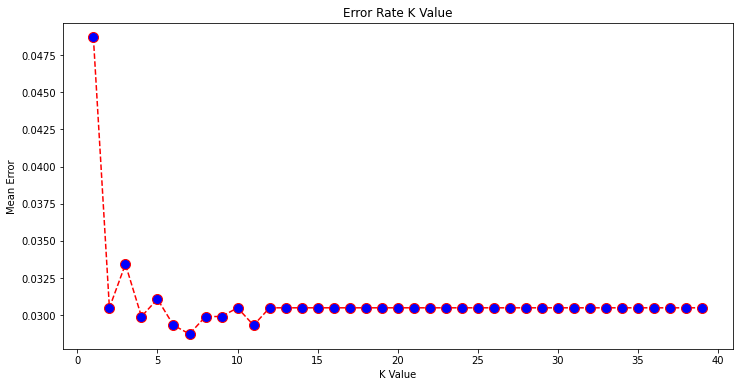

In [48]:
ML_alg(df1)

In [ ]:
#Finish